<a href="https://colab.research.google.com/github/dyjdlopez/icpep-ai-workshop-2021/blob/main/day1/ICpEP_AI_D1_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Vanilla Image Processing
Now that we have a bit of a background on how tensors work we'll try to dwell deeper in the fundamentals of Image Processing. Understanding image processing will greatly help in analyzing the data in Computer Vision and once we are going to use Deep Learning to work with them. Digital Signals in general is the first step in creating cognitive systems since we need to fit raw data into manageable and interpretable formats understood by the computer. <br>
![image](https://electronicspost.com/wp-content/uploads/2016/08/2-768x146.png)

## Part 1: Images and Signals

### 1.1 OpenCV
Some of you might already be familiar with Digital Signal Processing. In image processing we can just take the concepts of DSP from one-dimnensional signals to higher dimensions. <br>
One of the famous used libraries for image processing in Python (and in C++) is OpenCV, an open-source library for Computer Vision. You can read more about OpenCV and its documentation [here](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html). OpenCV provides APIs from basic to advanced image processing as well as deep learning model deployment.

In [2]:
import cv2 ## OpenCV
import matplotlib.pyplot as plt #Showing image outputs
import numpy as np # for linear algebra operations


### 1.2 Images as Tensors
We tried to visualize images previously using matrices, but let's now try to use an actual image file which you have downloaded.<br>
Check out:
* [`cv2.imread`](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
* [`cv2.imwrite`](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce)

In [139]:
image = cv2.imread("lenna.png")
image.shape

(512, 512, 3)

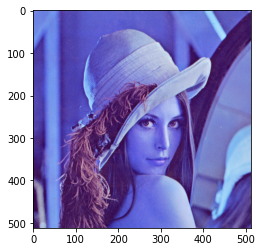

In [4]:
plt.imshow(image)
plt.show()

You might notice the vibrant Lenna image sample looks like she came from Avatar. This is because the channel encoding of OpenCV is BGR (Blue, Green, Red) while MatPlotLib using RGB. To fix this we need  to swap the channels.

Check out:
* [`cv2.cvtColor`](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)
* [OpenCV Color Conversion Codes](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)
* [`cv2.split`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)

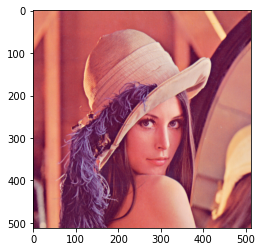

In [9]:
def rgb(image): return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb(image))
plt.show()

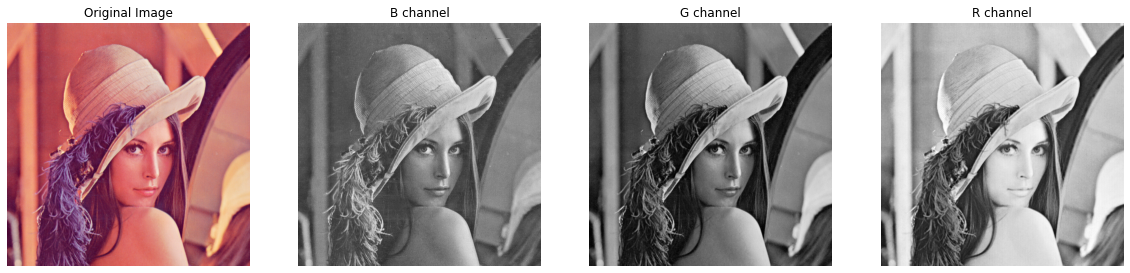

In [140]:
b,g,r = cv2.split(image)

plt.figure(figsize=(20,16))
plt.subplot(141)
plt.title("Original Image")
plt.imshow(rgb(image))
plt.axis("off")

plt.subplot(142)
plt.title("B channel")
plt.imshow(b, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("G channel")
plt.imshow(g, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("R channel")
plt.imshow(r, cmap='gray')
plt.axis("off")

plt.show()

In [142]:
## Saving an image
cv2.imwrite("lenna_blue_channel.jpg", b)

True

In [ ]:
def imshow(img):
  plt.figure(figsize=(15, 9), dpi=80) 
  plt.imshow(rgb(img))
  plt.axis("off")
  plt.show()

## Part 2: Manipulating Images
If you're familiar with Photoshop you might also be familiar with the image operations we are going to tackle, the difference is we'll try to dwell in the theory, math, and code behind them.

### 2.1 Geometric Manipulation


#### <i>Resizing</i>
Check out:
* [cv2.resize](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)
* [More Image Translations](https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html)

In [17]:
big_img = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2))
print(big_img.shape)
small_img = cv2.resize(image, (int(image.shape[1]/4), int(image.shape[0]/4)))
print(small_img.shape)


(1024, 1024, 3)
(128, 128, 3)


In [18]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(121)
plt.imshow(rgb(big_img))
plt.subplot(122)
plt.imshow(rgb(small_img))
plt.show()


#### <i>Cropping</i>


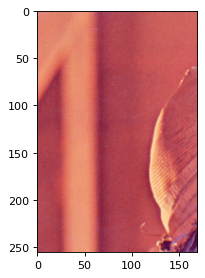

In [21]:
x_min, x_max = 0, image.shape[0]//2
y_min, y_max = 0, image.shape[1]//3
crop_img = image[x_min:x_max, y_min:y_max]
plt.figure(figsize=(7, 4), dpi=80) 
plt.imshow(rgb(crop_img))
plt.show()

### 2.3 Channel Manipulation
Previously we had an understanding that colored images are compsed of different channels (Red, Green, and Blue). We can further poke around with these channels. <br>
Manipulating channels is widely used in pre-processing data before feeding into a cognitive program. This sets how many parameters (features) to be analyzed.

#### <i>Grayscaling</i>
Grayscaling is probably the easiest channel manipulation. To flatten out the channels of the image we just need to get the average of the channel values across a pixel.

Check out:
* [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

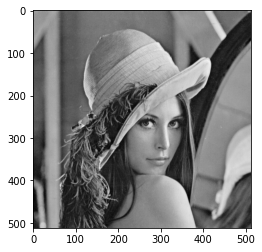

(512, 512)

In [23]:
gray_np = np.mean(image, axis=-1)
plt.imshow(gray_np, cmap='gray')
plt.show()
gray_np.shape

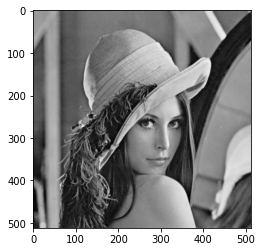

(512, 512)

In [25]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()
gray.shape

#### <i>HSV</i>
HSV (Hue, Saturation, Value) HSB (..,Brightness), HSL(...,Lightness), or HSI(...,Intensity) is an alternative color space which is closer to human perception. 
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/HSV_color_solid_cylinder_saturation_gray.png/800px-HSV_color_solid_cylinder_saturation_gray.png)

In [26]:
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

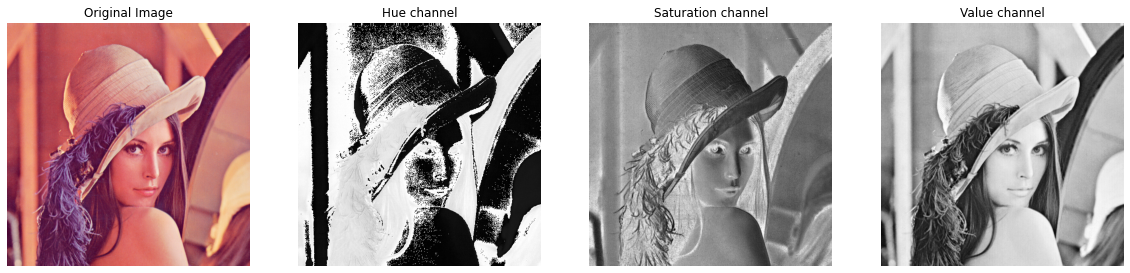

In [27]:
h,s,v = cv2.split(hsv_image)

plt.figure(figsize=(20,16))

plt.subplot(141)
plt.title("Original Image")
plt.imshow(rgb(image))
plt.axis("off")

plt.subplot(142)
plt.title("Hue channel")
plt.imshow(h, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("Saturation channel")
plt.imshow(s, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("Value channel")
plt.imshow(v, cmap='gray')
plt.axis("off")

plt.show()

### Contrast Adjustment
Contrast adjustment can be achieved using the [Gamma Correction](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm) algorithm. Long story short, gamma correction uses the power-law to adjus the intensity of a channel. To obtain the a gamma corrected image we used the following expression:
$$I' = 255 \times \begin{pmatrix}\frac{I}{255}\end{pmatrix}^{\frac{1}{\gamma}}$$

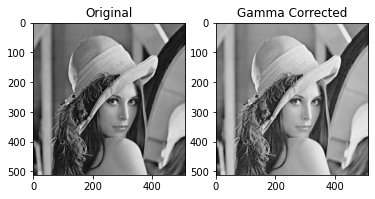

In [52]:
#@title Try out adjusting the gamma
gamma =  2#@param {type:"number"}
inv_gamma = 1.0/gamma
corrected_img = 255 * np.power(gray/255,inv_gamma)
plt.subplot(121), plt.title('Original'), plt.imshow(gray, cmap='gray')
plt.subplot(122), plt.title('Gamma Corrected'),plt.imshow(corrected_img, cmap='gray')
plt.show()

#### <i>Histogram Equalization</i>
Another fundamental image processing operation is [Histogram Equalization](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html). This technique uses the intensity distribution of an image and 'stretch' it to improve contrast along channels.<br>
Check out:
* [cv2.equalizeHist](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)
* [cv2.calcHist](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)
* [cv2.split](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga8027f9deee1e42716be8039e5863fbd9)

* [cv2.merge](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d)

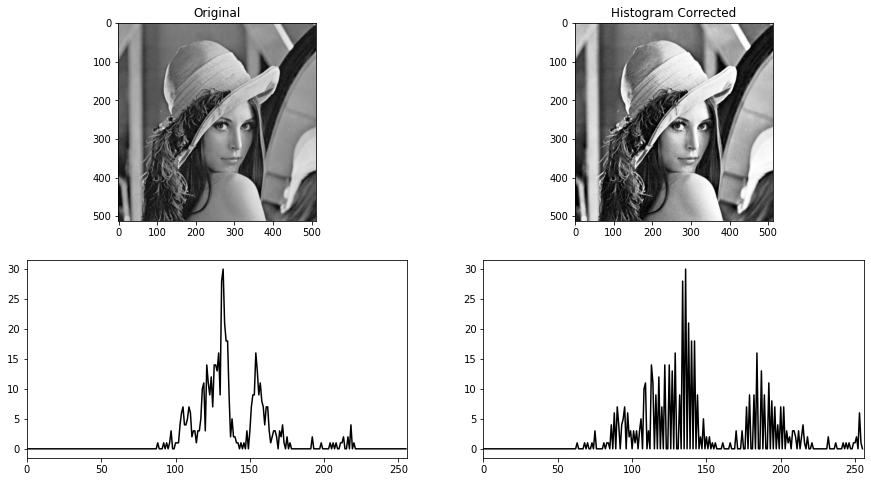

In [62]:
hist_img = cv2.equalizeHist(gray)

plt.figure(figsize=(15,8))
plt.subplot(221), plt.title('Original'), plt.imshow(gray, cmap='gray')
plt.subplot(223)
hist = cv2.calcHist(gray, [0], None, [256], [0, 256]) 
plt.plot(hist, color='black') 
plt.xlim([0, 256])

plt.subplot(222), plt.title('Histogram Corrected'),plt.imshow(hist_img, cmap='gray')
ehist = cv2.calcHist(hist_img, [0], None, [256], [0, 256]) 
plt.subplot(224)
plt.plot(ehist, color='black') 
plt.xlim([0, 256])
plt.show()

In [63]:
## RGB Histogram Equalization
plt_img = rgb(image)
ch_rgb = cv2.split(plt_img)
colors = ("r", "g", "b")
equ_rgb= []
for channel in ch_rgb:
    equ_rgb.append(cv2.equalizeHist(channel))
hequ_rgb = cv2.merge(equ_rgb)


In [64]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221) 
plt.imshow(plt_img) 
plt.title("Original Image") 
plt.axis('off') 
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

for (channel, color) in zip(ch_rgb, colors): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256])

plt.subplot(222) 
plt.imshow(hequ_rgb) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color) in zip(equ_rgb, colors): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256]) 
plt.show()

In [65]:
## HSV Histogram Equalization
ch_hsv = cv2.split(hsv_image)
ch_hsv_eq = ch_hsv[0], ch_hsv[1], cv2.equalizeHist(ch_hsv[2])
hequ_hsv = cv2.merge(ch_hsv_eq)

In [66]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(222), plt.title('HSV Histogram Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

labels = ("hue","saturation","value")
for (channel, color, label) in zip(ch_hsv, ('r','g','b'),labels): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256])
plt.legend()
plt.subplot(222) 
plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB)) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color, label) in zip(ch_hsv_eq, ('r','g','b'),labels): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256]) 
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


In [67]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(131), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(132), plt.title('RGB Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(hequ_rgb)
plt.subplot(133), plt.title('HSV Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.show()

## Part 3: Filters and Convolutions

### 3.1 Convolutions

The formula for a 2D convolution is given as:
![picture](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation4-c.jpg)

Here's an animation of how convolutions work. The 5x5 matrix on the left is the original matrix or image, the 3x3 matrix is the kernel or filter in which we will convolve with the original matrix to get the resulting matric on the left.
![picture](https://miro.medium.com/max/1920/1*D6iRfzDkz-sEzyjYoVZ73w.gif) <br>
[SciPy](https://docs.scipy.org/doc/scipy/reference/) or Scientific Python is another important library for computational programming which contains a plethora of functions for advanced operations including digital signal operations. For discussion purposes we will be using SciPy's [convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) to perform 2D convolution.



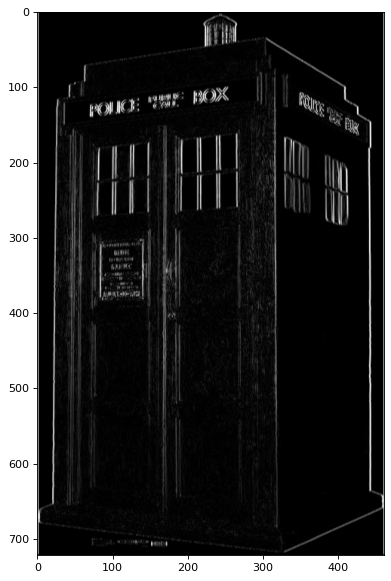

In [116]:
from scipy.signal import convolve2d as conv
# conv_img = cv2.imread('tardis.png',0)
conv_img = gray
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
g = np.abs(conv(conv_img,kernel))
plt.figure(figsize=(15, 9), dpi=80) 
plt.imshow(g,cmap='gray')

### 3.2 Edge Detection
One of the main uses of convolutions is for edge detection. There are a lot of filters that can be used for edge detection, but for our example we will be using the Sobel filters. The following are the Sobel filters for horizontal ($g_x$) and vertical ($g_y$) edge detection respectively:
$$
g_x = \begin{bmatrix}
1&0&-1 \\ 
2&0&-2 \\
1&0&-1  \end{bmatrix}, 
g_y = \begin{bmatrix}
1&2&1 \\ 
0&0&0 \\
-1&-2&-1  \end{bmatrix}
$$
We can obtain the approximate derivatives of the image with respect to horizontal and vertical changes by convolving $g_x$ and $g_y$ with the original image $A$. We can then have:
$$G_x = g_x * A , G_y = g_y*A$$
The magnitude of the gradient of the image can be computed as:
$$G = \sqrt{{G_x}^2 + {G_y}^2}$$

In [118]:
gx = np.array([
    [1, 0, -1],
    [ 2, 0, -2],
    [ 1, 0, -1]
])
gy = gx.T

In [119]:
Gx = np.abs(conv(conv_img,gx))
Gy = np.abs(conv(conv_img,gy))
G = np.sqrt(Gx**2 + Gy**2)

In [120]:
plt.figure(figsize=(20, 15), dpi=80) 
plt.subplot(131), plt.title("|Gx|"), plt.xticks([]), plt.yticks([]), plt.imshow(Gx, cmap='gray')
plt.subplot(132), plt.title("|Gy|"), plt.xticks([]), plt.yticks([]), plt.imshow(Gy, cmap='gray')
plt.subplot(133), plt.title("G"), plt.xticks([]), plt.yticks([]), plt.imshow(G, cmap='gray')
plt.show()

### 3.2 Blurring
Another great use of convolutions is through low-pass filtering or "smoothing" which produces a blurring effect on the output image. Using different smoothing filters or kernels could yield different types of blurs.


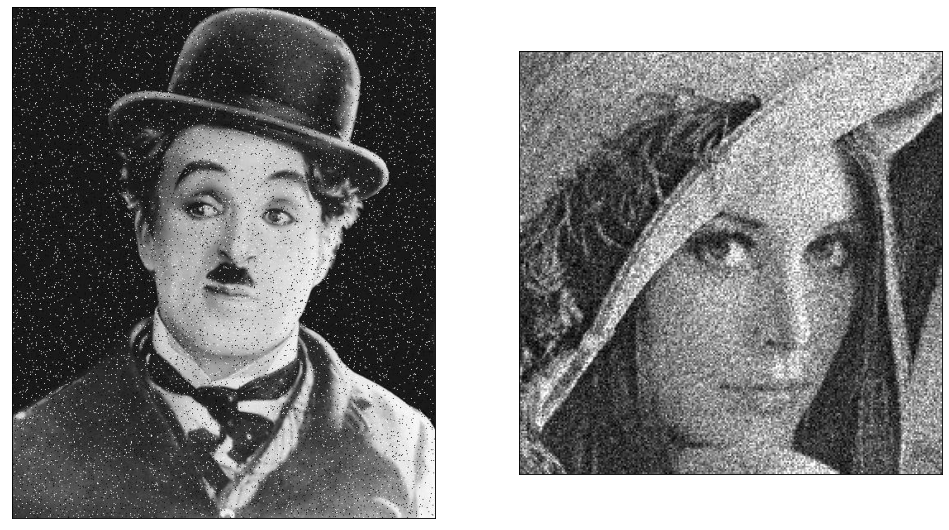

In [114]:
noisy_images = ["charlie_noise.png","lenna_noise_gray.png"]
noisy = []
for image in noisy_images:
  noisy.append(cv2.imread(image, 0))

plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.show()

#### <i>Average Blur</i>
Average blur can be achieved by convolving using a regularized box filter. It simply takes the average of the pixels under the filter area.
Check out:
* [cv2.blur](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)
* [cv2.boxFilter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3)

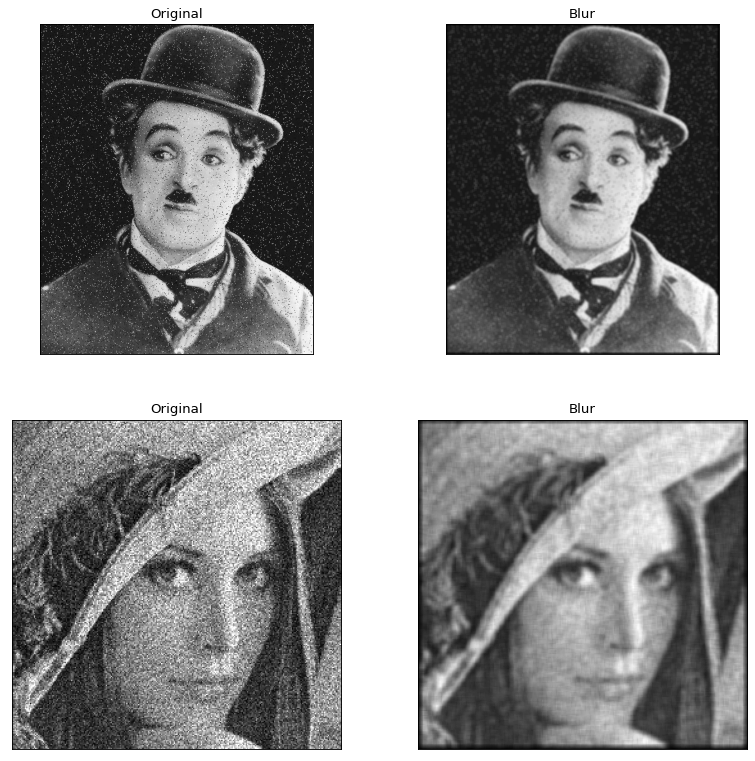

In [ ]:
dim = 5
ave_filter = np.ones((dim,dim))/(dim**dim)

ave_blurs = []
for image in noisy:
  ave_blurs.append(np.abs(conv(image,ave_filter)))

plt.figure(figsize=(12, 12), dpi=80) 
plt.subplot(221), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(222), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(223), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(224), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.show()

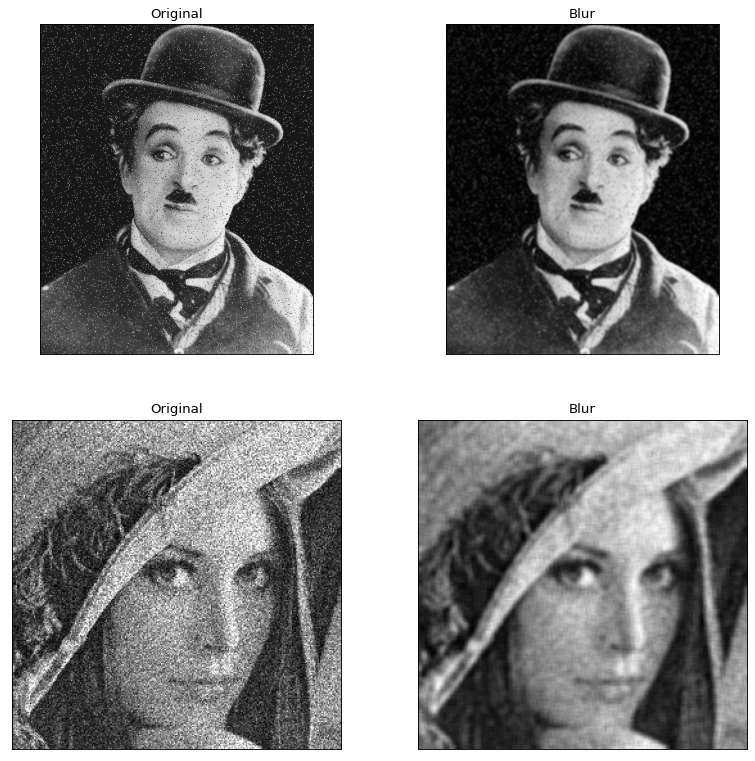

In [124]:
ave_blurs = []  
for image in noisy:
  ave_blurs.append(cv2.blur(image,(5,5)))
  
plt.figure(figsize=(12, 12), dpi=80) 
plt.subplot(221), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(222), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(223), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(224), plt.title("Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.show()


#### <i>Gaussian Blur/Smoothing</i>
In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, [cv2.GaussianBlur](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1). <br>

We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image. <br><br><i>Text from: [Smoothing Operations — Gaussian Blurring](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)</i>




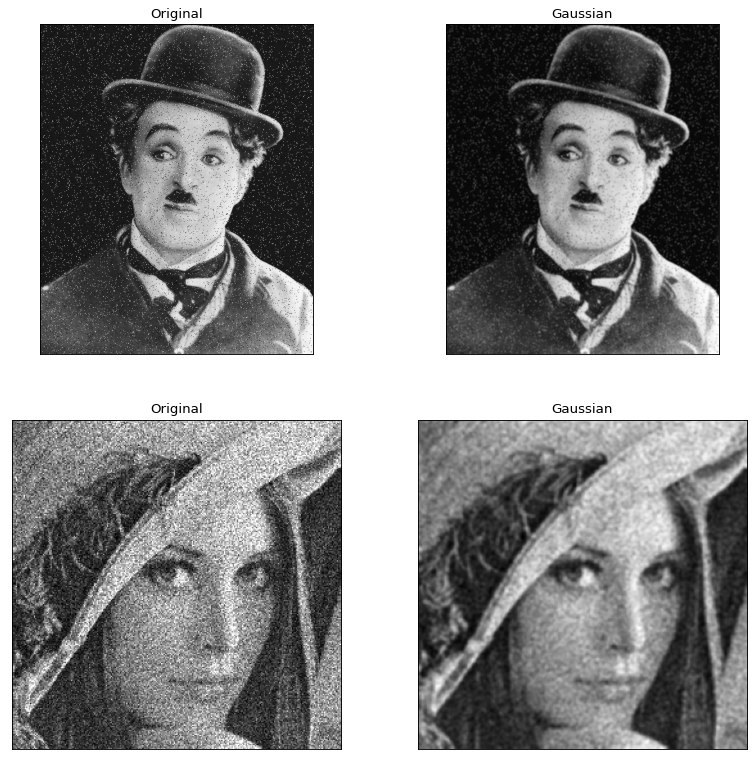

In [125]:
gauss_blurs = []  
for image in noisy:
  gauss_blurs.append(cv2.GaussianBlur(image,(5,5),0))


plt.figure(figsize=(12, 12), dpi=80) 
plt.subplot(221), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(222), plt.title("Gaussian"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[0], cmap='gray')
plt.subplot(223), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(224), plt.title("Gaussian"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[1], cmap='gray')
plt.show()


#### <i> Median Blur</i>
Median blur takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. You can implement this using [`cv2.medianBlur`](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)

<br><br><i>Text from: [Smoothing Operations — Median Blurring](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)</i>

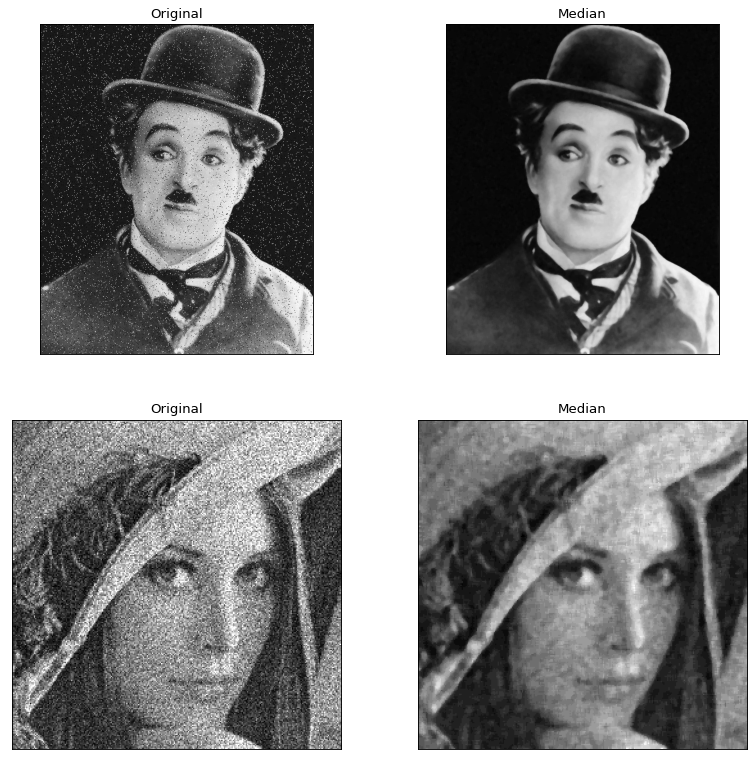

In [126]:
med_blurs = []  
for image in noisy:
  med_blurs.append(cv2.medianBlur(image, 5))


plt.figure(figsize=(12, 12), dpi=80) 
plt.subplot(221), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(222), plt.title("Median"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[0], cmap='gray')
plt.subplot(223), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(224), plt.title("Median"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[1], cmap='gray')
plt.show()


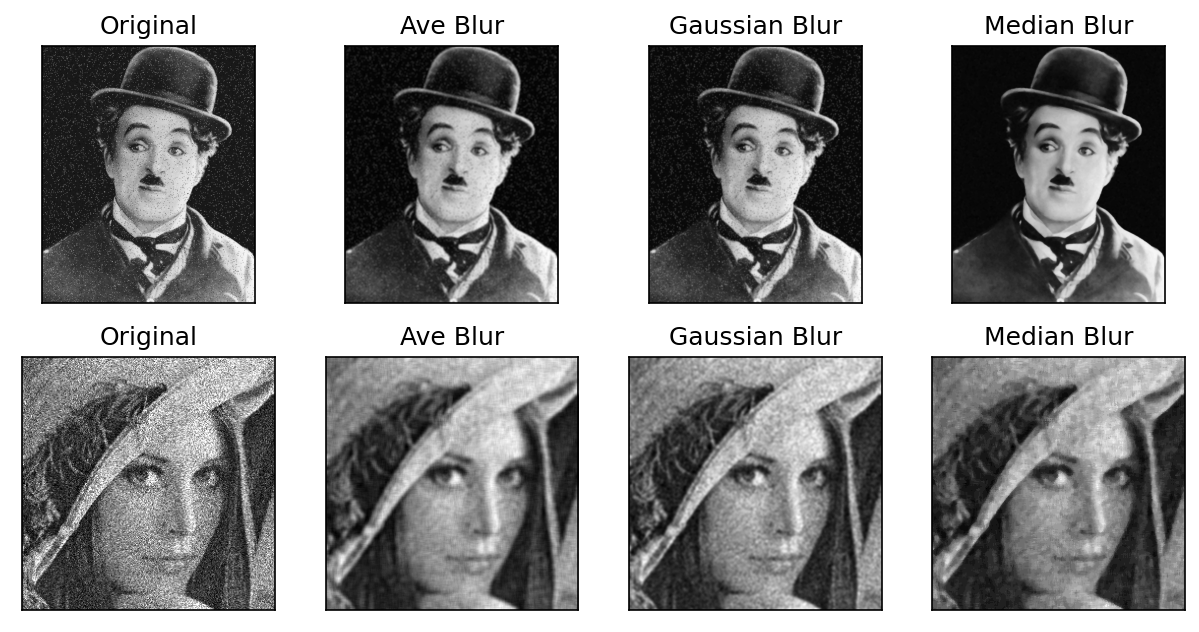

In [134]:
plt.figure(figsize=(10, 5), dpi=150) 
plt.subplot(241), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[0], cmap='gray')
plt.subplot(242), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[0], cmap='gray')
plt.subplot(243), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[0], cmap='gray')
plt.subplot(244), plt.title("Median Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[0], cmap='gray')
plt.subplot(245), plt.title("Original"), plt.xticks([]), plt.yticks([]), plt.imshow(noisy[1], cmap='gray')
plt.subplot(246), plt.title("Ave Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(ave_blurs[1], cmap='gray')
plt.subplot(247), plt.title("Gaussian Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(gauss_blurs[1], cmap='gray')
plt.subplot(248), plt.title("Median Blur"), plt.xticks([]), plt.yticks([]), plt.imshow(med_blurs[1], cmap='gray')
plt.show()

#### <i>Compound Filtering</i>

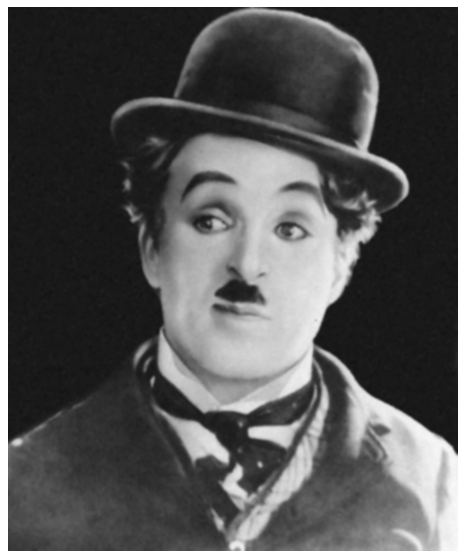

In [ ]:
charlie_noise = noisy[0]
charlie_noise = cv2.medianBlur(charlie_noise, 3)
charlie_noise = cv2.GaussianBlur(charlie_noise,(5,5),0)
imshow(charlie_noise)

# Summary
In this section, we discussed the fundamentals of digital image processing — in which it is the extended concept of digital image processing with signals two dimensions and greater. Specifically, we tackled how to read, process, and write images. We saw how to use the common image manipulation operations such as resizing and cropping images. <br>
We also discussed color channels and how to process colored images per layer. We did contrast control using Gamma Correction and Histogram Equalization. <br>
We got introduced to the convolution operation, specifically, 2D Convolutions. We saw it can be applied in edge detection and image filtering. <br>
We covered the minimum topics of image processing just to have a good start in Computer Vision. Here are some fun and essential topics in digital image processing:
* Warping
* Feature descriptors (i.e. SURF, SIFT, etc.)
* Video Processing
* Image Encoding and Decoding


# References
* [OpenCV Documentation](https://docs.opencv.org/master/annotated.html)
* [OpenCV Python Tutorials](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html)
* M.J. Khalid (2021) [Introduction to Image Processing in Python with OpenCV](https://stackabuse.com/introduction-to-image-processing-in-python-with-opencv/)
* Computer Vision Laboratory (2020) [Image Processing in Python](https://www.cvl.isy.liu.se/en/education/undergraduate/tsbb15/computer-exercises/lektion_python.pdf), Linköping University